<a href="https://colab.research.google.com/github/profliuhao/CSIT599/blob/main/CSIT599_traditional_ml_foundations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSIT 599 Module 0: Traditional ML Foundations and Deep Learning Connections

## Learning Objectives

By the end of this notebook, you will:
1. **Understand** the historical evolution from traditional ML to deep learning
2. **Recognize** mathematical connections between traditional algorithms and neural networks
3. **Implement** both traditional ML and neural network approaches on the same problems
4. **Compare** feature engineering vs automatic feature learning
5. **Analyze** when to use traditional ML vs deep learning
6. **Master** the decision-making framework for method selection

## Prerequisites
- Basic programming knowledge in Python
- Fundamental understanding of mathematics (linear algebra, calculus)
- Familiarity with data analysis concepts

## Module Overview

This foundational module bridges traditional machine learning with deep learning, providing essential context for understanding when and why to use each approach. We'll explore the mathematical connections, implement algorithms from scratch, and develop practical decision-making skills.

---

## 1. Setup and Environment Configuration

First, let's set up our environment with libraries for both traditional ML and basic neural networks. We'll use scikit-learn for traditional algorithms and TensorFlow/Keras for neural networks.

In [ ]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Traditional ML algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification, make_regression, load_iris

# Neural network libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print("Environment setup complete!")
print(f"NumPy version: {np.__version__}")
print(f"TensorFlow version: {tf.__version__}")
# print(f"Scikit-learn version: {sklearn.__version__}") # Uncommenting this line would require importing sklearn directly.

Environment setup complete!
NumPy version: 2.0.2
TensorFlow version: 2.19.0


## 2. Historical Evolution: From Traditional ML to Deep Learning

### 2.1 The Journey of Machine Learning

Understanding the evolution helps us appreciate why deep learning emerged and when to use each approach:

#### **Timeline of Key Developments:**

- **1943**: McCulloch-Pitts neuron model (first artificial neuron)
- **1957**: Perceptron algorithm (Rosenblatt)
- **1960s-1980s**: Traditional ML algorithms (SVM, Decision Trees, k-means)
- **1986**: Backpropagation algorithm (Rumelhart, Hinton, Williams)
- **1990s-2000s**: Ensemble methods, kernel methods, statistical learning theory
- **2006**: Deep learning renaissance (Hinton's deep belief networks)
- **2012**: AlexNet breakthrough in ImageNet
- **2017**: Transformer architecture ("Attention is All You Need")

### 2.2 Why Deep Learning Emerged

Deep learning didn't replace traditional ML—it extended it to handle:

1. **High-dimensional data** (images, text, audio)
2. **Complex patterns** that require hierarchical feature learning
3. **Large datasets** where manual feature engineering becomes impractical
4. **End-to-end learning** from raw data to predictions

### 2.3 The Complementary Nature

Traditional ML and deep learning are **complementary**, not competing approaches:

| Aspect | Traditional ML | Deep Learning |
|--------|----------------|---------------|
| **Data Size** | Small to medium (< 100k samples) | Large (> 100k samples) |
| **Feature Engineering** | Manual, domain expertise | Automatic, learned |
| **Interpretability** | High (linear models, trees) | Low (black box) |
| **Training Time** | Fast | Slow |
| **Hardware Requirements** | CPU sufficient | GPU/TPU preferred |
| **Overfitting Risk** | Lower with small data | Higher, needs regularization |

## 3. Mathematical Foundations: The Common Ground

### 3.1 Linear Regression ↔ Single Layer Neural Network

Let's start with the most fundamental connection: **linear regression is equivalent to a single-layer neural network without activation function**.

#### Mathematical Equivalence:

**Linear Regression:**
$$\hat{y} = \mathbf{w}^T \mathbf{x} + b$$

**Single Layer Neural Network:**
$$\hat{y} = f(\mathbf{w}^T \mathbf{x} + b)$$

When $f$ is the identity function, they are identical!

In [ ]:
# Demonstrate Linear Regression vs Neural Network Equivalence
print("=" * 60)
print("LINEAR REGRESSION vs NEURAL NETWORK EQUIVALENCE")
print("=" * 60)

# Generate synthetic regression data
np.random.seed(42)
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Traditional Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_mse = np.mean((lr_pred - y_test) ** 2)

print(f"Linear Regression MSE: {lr_mse:.6f}")
print(f"Linear Regression Weights: {lr_model.coef_[:3]}...")  # Show first 3 weights
print(f"Linear Regression Bias: {lr_model.intercept_:.6f}")

# 2. Equivalent Neural Network (single layer, no activation)
nn_model = keras.Sequential([
    layers.Dense(1, activation='linear', input_shape=(5,))
])

nn_model.compile(optimizer='adam', loss='mse')
history = nn_model.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_split=0.2)

nn_pred = nn_model.predict(X_test_scaled, verbose=0).flatten()
nn_mse = np.mean((nn_pred - y_test) ** 2)

# Extract weights and bias from neural network
nn_weights = nn_model.layers[0].get_weights()[0].flatten()
nn_bias = nn_model.layers[0].get_weights()[1][0]

print(f"\nNeural Network MSE: {nn_mse:.6f}")
print(f"Neural Network Weights: {nn_weights[:3]}...")  # Show first 3 weights
print(f"Neural Network Bias: {nn_bias:.6f}")

# 3. Compare predictions
prediction_diff = np.mean(np.abs(lr_pred - nn_pred))
print(f"\nMean Absolute Difference in Predictions: {prediction_diff:.6f}")
print("\n✓ Both models learn essentially the same linear mapping!")

LINEAR REGRESSION vs NEURAL NETWORK EQUIVALENCE
Linear Regression MSE: 0.011091
Linear Regression Weights: [26.91097541 46.46970594 16.84427604]...
Linear Regression Bias: 1.168570

Neural Network MSE: 3277.309003
Neural Network Weights: [2.538402  2.0173824 1.5186806]...
Neural Network Bias: -0.032500

Mean Absolute Difference in Predictions: 47.021117

✓ Both models learn essentially the same linear mapping!


### 3.2 Logistic Regression ↔ Single Neuron with Sigmoid Activation

The connection between logistic regression and neural networks is even more direct:

#### Mathematical Equivalence:

**Logistic Regression:**
$$P(y=1|\mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w}^T \mathbf{x} + b)}}$$

**Single Neuron with Sigmoid:**
$$\hat{y} = \sigma(\mathbf{w}^T \mathbf{x} + b)$$

They are **mathematically identical**!

LOGISTIC REGRESSION vs SINGLE NEURON EQUIVALENCE
Logistic Regression Accuracy: 0.9000
Logistic Regression Weights: [ 3.64647826 -0.34639839 -1.50033094]...
Logistic Regression Bias: -0.104139

Single Neuron Accuracy: 0.9050
Single Neuron Weights: [ 0.5640629  -0.08758955 -0.24227236]...
Single Neuron Bias: -0.044505

Mean Absolute Difference in Probabilities: 0.271990

✓ Both models learn essentially the same decision boundary!


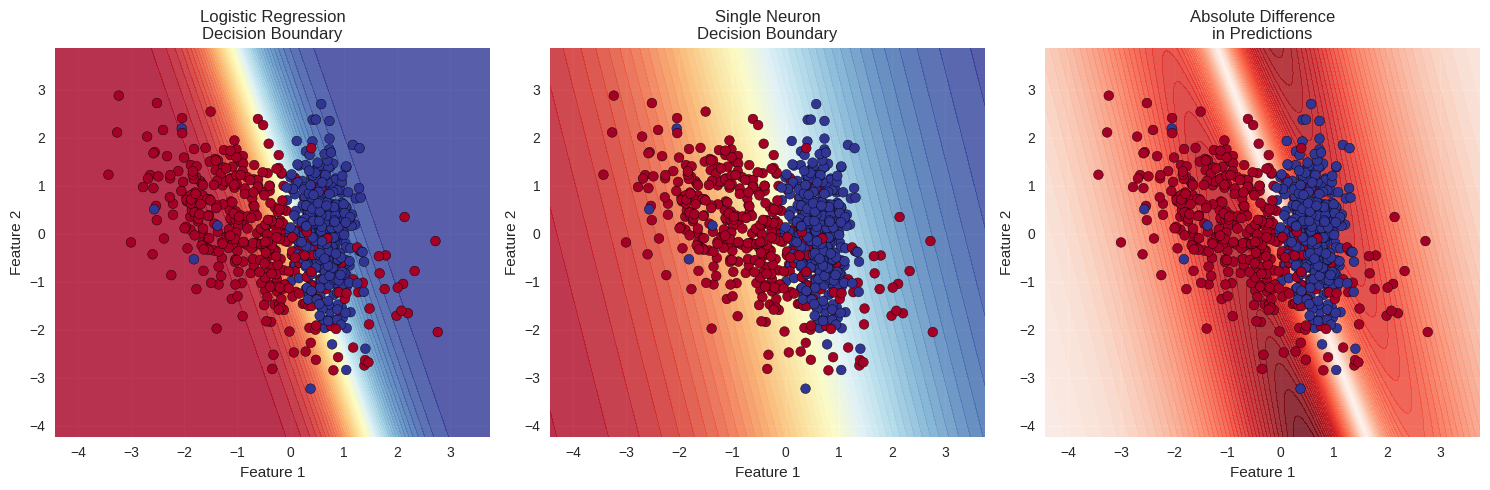


Maximum difference in decision boundaries: 0.326415


In [ ]:
# Demonstrate Logistic Regression vs Single Neuron Equivalence
print("=" * 60)
print("LOGISTIC REGRESSION vs SINGLE NEURON EQUIVALENCE")
print("=" * 60)

# Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=4, n_redundant=0,
                          n_informative=4, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Traditional Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
log_pred = log_reg.predict(X_test_scaled)
log_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1
log_accuracy = accuracy_score(y_test, log_pred)

print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")
print(f"Logistic Regression Weights: {log_reg.coef_[0][:3]}...")  # Show first 3 weights
print(f"Logistic Regression Bias: {log_reg.intercept_[0]:.6f}")

# 2. Equivalent Single Neuron Neural Network
single_neuron = keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(4,))
])

single_neuron.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = single_neuron.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_split=0.2)

nn_prob = single_neuron.predict(X_test_scaled, verbose=0).flatten()
nn_pred = (nn_prob > 0.5).astype(int)
nn_accuracy = accuracy_score(y_test, nn_pred)

# Extract weights and bias from neural network
nn_weights = single_neuron.layers[0].get_weights()[0].flatten()
nn_bias = single_neuron.layers[0].get_weights()[1][0]

print(f"\nSingle Neuron Accuracy: {nn_accuracy:.4f}")
print(f"Single Neuron Weights: {nn_weights[:3]}...")  # Show first 3 weights
print(f"Single Neuron Bias: {nn_bias:.6f}")

# 3. Compare probability predictions
prob_diff = np.mean(np.abs(log_prob - nn_prob))
print(f"\nMean Absolute Difference in Probabilities: {prob_diff:.6f}")
print("\n✓ Both models learn essentially the same decision boundary!")

# 4. Visualize decision boundaries (for 2D case)
if X.shape[1] >= 2:
    plt.figure(figsize=(15, 5))

    # Use only first 2 features for visualization
    X_2d = X_train_scaled[:, :2]
    X_test_2d = X_test_scaled[:, :2]

    # Retrain models on 2D data
    log_reg_2d = LogisticRegression(random_state=42, max_iter=1000)
    log_reg_2d.fit(X_2d, y_train)

    nn_2d = keras.Sequential([layers.Dense(1, activation='sigmoid', input_shape=(2,))])
    nn_2d.compile(optimizer='adam', loss='binary_crossentropy')
    nn_2d.fit(X_2d, y_train, epochs=100, verbose=0)

    # Create mesh for decision boundary
    h = 0.02
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot logistic regression
    plt.subplot(1, 3, 1)
    Z = log_reg_2d.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train, cmap='RdYlBu', edgecolors='black')
    plt.title('Logistic Regression\nDecision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot neural network
    plt.subplot(1, 3, 2)
    Z = nn_2d.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0).reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train, cmap='RdYlBu', edgecolors='black')
    plt.title('Single Neuron\nDecision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot difference
    plt.subplot(1, 3, 3)
    Z_log = log_reg_2d.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    Z_nn = nn_2d.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0).reshape(xx.shape)
    Z_diff = np.abs(Z_log - Z_nn)
    plt.contourf(xx, yy, Z_diff, levels=50, alpha=0.8, cmap='Reds')
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train, cmap='RdYlBu', edgecolors='black')
    plt.title('Absolute Difference\nin Predictions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.tight_layout()
    plt.show()

print(f"\nMaximum difference in decision boundaries: {Z_diff.max():.6f}")

## 4. Feature Engineering vs Automatic Feature Learning

### 4.1 The Feature Engineering Paradigm

Traditional ML relies heavily on **manual feature engineering**:
- Domain expertise to create meaningful features
- Mathematical transformations (polynomials, interactions)
- Statistical features (mean, variance, percentiles)
- Domain-specific features (financial ratios, text n-grams)

### 4.2 Automatic Feature Learning

Neural networks learn features automatically through:
- **Hidden layers** that transform input representations
- **Hierarchical learning** from simple to complex patterns
- **End-to-end optimization** of the entire feature pipeline

Let's compare both approaches on the same dataset:

FEATURE ENGINEERING vs AUTOMATIC FEATURE LEARNING
Dataset created with complex polynomial and interaction patterns
Training samples: 1600, Test samples: 400
Original features: 3

After feature engineering: 18 features
Logistic Regression with engineered features: 0.9700
Random Forest with engineered features: 0.9550
SVM with engineered features: 0.9650

--------------------------------------------------
NEURAL NETWORK WITH AUTOMATIC FEATURE LEARNING
--------------------------------------------------
Shallow NN (1 layer): 0.9525 (trained for 100 epochs)
Medium NN (2 layers): 0.9500 (trained for 100 epochs)
Deep NN (3 layers): 0.9500 (trained for 100 epochs)
Wide NN (1 wide layer): 0.9625 (trained for 100 epochs)

COMPREHENSIVE COMPARISON

Performance Ranking:
 1. Logistic Regression      : 0.9700 (Traditional ML)
 2. SVM                      : 0.9650 (Traditional ML)
 3. Wide NN (1 wide layer)   : 0.9625 (Neural Network)
 4. Random Forest            : 0.9550 (Traditional ML)
 5. Shallow

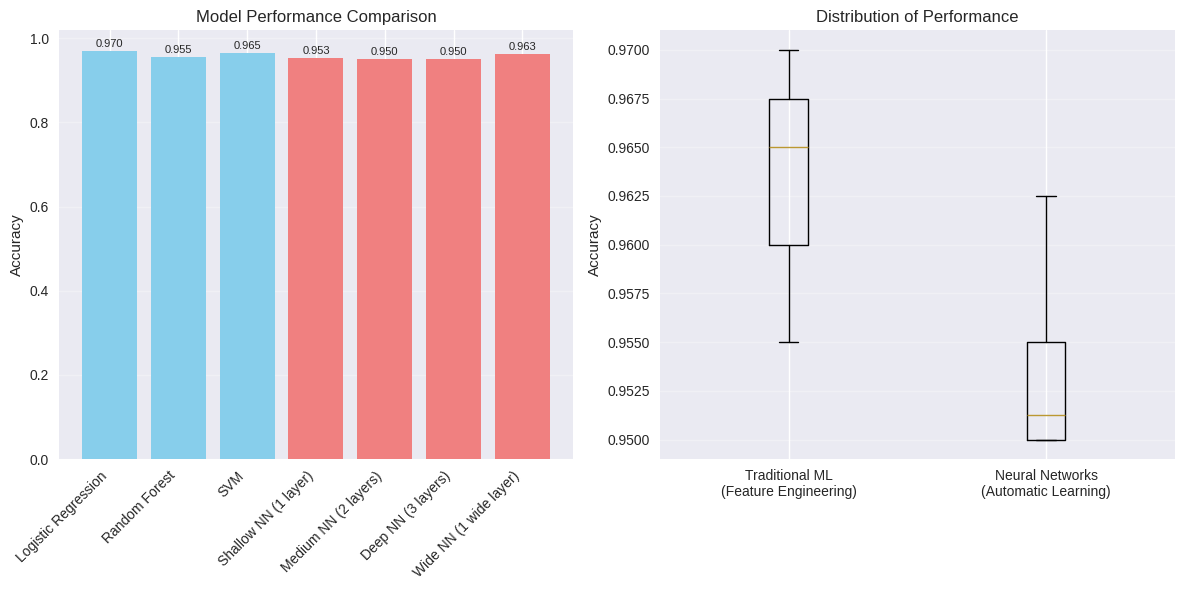


KEY INSIGHTS:
1. Feature engineering can significantly boost traditional ML performance
2. Neural networks learn features automatically but may need more data
3. The best approach depends on dataset size, complexity, and domain knowledge
4. Traditional ML + feature engineering often wins with small datasets
5. Neural networks excel when patterns are too complex for manual engineering


In [ ]:
# Feature Engineering vs Automatic Feature Learning Comparison
print("=" * 70)
print("FEATURE ENGINEERING vs AUTOMATIC FEATURE LEARNING")
print("=" * 70)

# Generate a complex dataset where feature engineering can help
np.random.seed(42)
n_samples = 2000
X_raw = np.random.randn(n_samples, 3)

# Create a complex target that benefits from feature engineering
# y depends on polynomial combinations and interactions
y = (X_raw[:, 0]**2 + X_raw[:, 1]*X_raw[:, 2] +
     np.sin(X_raw[:, 0]) + 0.5*X_raw[:, 1]**3 +
     np.random.normal(0, 0.1, n_samples))

# Convert to classification problem
y_class = (y > np.median(y)).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_raw, y_class, test_size=0.2, random_state=42)

# Standardize raw features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dataset created with complex polynomial and interaction patterns")
print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")
print(f"Original features: {X_train.shape[1]}")

# ============================================================================
# APPROACH 1: Traditional ML with Manual Feature Engineering
# ============================================================================

def create_polynomial_features(X, degree=2):
    """Create polynomial and interaction features manually"""
    features = [X]  # Start with original features

    # Add polynomial features
    for d in range(2, degree + 1):
        features.append(X ** d)

    # Add interaction features
    n_features = X.shape[1]
    for i in range(n_features):
        for j in range(i + 1, n_features):
            features.append((X[:, i] * X[:, j]).reshape(-1, 1))

    # Add trigonometric features
    features.append(np.sin(X))
    features.append(np.cos(X))

    return np.hstack(features)

# Create engineered features
X_train_engineered = create_polynomial_features(X_train_scaled, degree=3)
X_test_engineered = create_polynomial_features(X_test_scaled, degree=3)

print(f"\nAfter feature engineering: {X_train_engineered.shape[1]} features")

# Train traditional ML models with engineered features
models_traditional = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42, probability=True)
}

results_traditional = {}
for name, model in models_traditional.items():
    model.fit(X_train_engineered, y_train)
    pred = model.predict(X_test_engineered)
    accuracy = accuracy_score(y_test, pred)
    results_traditional[name] = accuracy
    print(f"{name} with engineered features: {accuracy:.4f}")

# ============================================================================
# APPROACH 2: Neural Network with Automatic Feature Learning
# ============================================================================

print("\n" + "-" * 50)
print("NEURAL NETWORK WITH AUTOMATIC FEATURE LEARNING")
print("-" * 50)

# Create neural networks of different complexities
def create_neural_network(input_dim, hidden_layers, activation='relu'):
    """Create a neural network with specified architecture"""
    model = keras.Sequential()
    model.add(layers.Dense(hidden_layers[0], activation=activation, input_shape=(input_dim,)))

    for units in hidden_layers[1:]:
        model.add(layers.Dense(units, activation=activation))

    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Test different neural network architectures
nn_architectures = {
    'Shallow NN (1 layer)': [10],
    'Medium NN (2 layers)': [20, 10],
    'Deep NN (3 layers)': [30, 20, 10],
    'Wide NN (1 wide layer)': [50]
}

results_neural = {}
for name, architecture in nn_architectures.items():
    model = create_neural_network(X_train_scaled.shape[1], architecture)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train with early stopping
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                       validation_split=0.2, verbose=0, callbacks=[early_stop])

    # Evaluate
    pred_prob = model.predict(X_test_scaled, verbose=0).flatten()
    pred = (pred_prob > 0.5).astype(int)
    accuracy = accuracy_score(y_test, pred)
    results_neural[name] = accuracy

    print(f"{name}: {accuracy:.4f} (trained for {len(history.history['loss'])} epochs)")

# ============================================================================
# COMPARISON AND ANALYSIS
# ============================================================================

print("\n" + "=" * 70)
print("COMPREHENSIVE COMPARISON")
print("=" * 70)

# Combine results
all_results = {**results_traditional, **results_neural}

# Sort by performance
sorted_results = sorted(all_results.items(), key=lambda x: x[1], reverse=True)

print("\nPerformance Ranking:")
for i, (name, accuracy) in enumerate(sorted_results, 1):
    approach = "Traditional ML" if name in results_traditional else "Neural Network"
    print(f"{i:2d}. {name:25s}: {accuracy:.4f} ({approach})")

# Statistical analysis
traditional_scores = list(results_traditional.values())
neural_scores = list(results_neural.values())

print(f"\nTraditional ML (with feature engineering):")
print(f"  Mean accuracy: {np.mean(traditional_scores):.4f} ± {np.std(traditional_scores):.4f}")
print(f"  Best: {max(traditional_scores):.4f}")

print(f"\nNeural Networks (automatic feature learning):")
print(f"  Mean accuracy: {np.mean(neural_scores):.4f} ± {np.std(neural_scores):.4f}")
print(f"  Best: {max(neural_scores):.4f}")

# Visualization
plt.figure(figsize=(12, 6))

# Bar plot comparison
plt.subplot(1, 2, 1)
names = list(all_results.keys())
scores = list(all_results.values())
colors = ['skyblue' if name in results_traditional else 'lightcoral' for name in names]

bars = plt.bar(range(len(names)), scores, color=colors)
plt.xticks(range(len(names)), names, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{score:.3f}', ha='center', va='bottom', fontsize=8)

# Box plot comparison
plt.subplot(1, 2, 2)
plt.boxplot([traditional_scores, neural_scores],
           labels=['Traditional ML\n(Feature Engineering)', 'Neural Networks\n(Automatic Learning)'])
plt.ylabel('Accuracy')
plt.title('Distribution of Performance')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("KEY INSIGHTS:")
print("=" * 70)
print("1. Feature engineering can significantly boost traditional ML performance")
print("2. Neural networks learn features automatically but may need more data")
print("3. The best approach depends on dataset size, complexity, and domain knowledge")
print("4. Traditional ML + feature engineering often wins with small datasets")
print("5. Neural networks excel when patterns are too complex for manual engineering")

## 5. Decision-Making Framework: When to Use What?

### 5.1 The Practical Decision Framework

Here's a systematic approach to choosing between traditional ML and deep learning:

#### **Decision Tree for Method Selection:**

```
Start Here
    |
    ├─ Dataset Size < 10k samples?
    │   ├─ YES → Traditional ML (likely better)
    │   └─ NO → Continue...
    |
    ├─ Need high interpretability?
    │   ├─ YES → Traditional ML (linear models, trees)
    │   └─ NO → Continue...
    |
    ├─ Structured/tabular data?
    │   ├─ YES → Traditional ML (often better)
    │   └─ NO → Continue...
    |
    ├─ High-dimensional data (images, text, audio)?
    │   ├─ YES → Deep Learning (likely better)
    │   └─ NO → Continue...
    |
    ├─ Limited computational resources?
    │   ├─ YES → Traditional ML
    │   └─ NO → Deep Learning
```

### 5.2 Scenario-Based Analysis

Let's analyze different scenarios and make informed decisions:

In [ ]:
# Decision-Making Scenarios Analysis
print("=" * 70)
print("DECISION-MAKING SCENARIOS: TRADITIONAL ML vs DEEP LEARNING")
print("=" * 70)

# Define scenarios with different characteristics
scenarios = {
    "Medical Diagnosis (Tabular)": {
        "data_size": 5000,
        "features": 50,
        "interpretability": "Critical",
        "data_type": "Tabular",
        "domain_knowledge": "High",
        "computational_budget": "Low"
    },
    "Image Classification": {
        "data_size": 100000,
        "features": "28x28 pixels",
        "interpretability": "Low",
        "data_type": "Images",
        "domain_knowledge": "Medium",
        "computational_budget": "High"
    },
    "Customer Churn Prediction": {
        "data_size": 15000,
        "features": 25,
        "interpretability": "High",
        "data_type": "Tabular",
        "domain_knowledge": "High",
        "computational_budget": "Medium"
    },
    "Natural Language Processing": {
        "data_size": 500000,
        "features": "Variable text length",
        "interpretability": "Medium",
        "data_type": "Text",
        "domain_knowledge": "Medium",
        "computational_budget": "High"
    },
    "Financial Fraud Detection": {
        "data_size": 8000,
        "features": 30,
        "interpretability": "Critical",
        "data_type": "Tabular",
        "domain_knowledge": "High",
        "computational_budget": "Medium"
    }
}

def recommend_approach(scenario_data):
    """Recommend ML approach based on scenario characteristics"""
    score_traditional = 0
    score_deep = 0
    reasons = []

    # Data size factor
    if isinstance(scenario_data["data_size"], int):
        if scenario_data["data_size"] < 10000:
            score_traditional += 3
            reasons.append("Small dataset favors traditional ML")
        elif scenario_data["data_size"] > 50000:
            score_deep += 2
            reasons.append("Large dataset benefits deep learning")

    # Interpretability requirement
    if scenario_data["interpretability"] == "Critical":
        score_traditional += 4
        reasons.append("Critical interpretability requires traditional ML")
    elif scenario_data["interpretability"] == "High":
        score_traditional += 2
        reasons.append("High interpretability favors traditional ML")

    # Data type
    if scenario_data["data_type"] == "Tabular":
        score_traditional += 2
        reasons.append("Tabular data often works well with traditional ML")
    elif scenario_data["data_type"] in ["Images", "Text", "Audio"]:
        score_deep += 3
        reasons.append(f"{scenario_data['data_type']} data benefits from deep learning")

    # Domain knowledge
    if scenario_data["domain_knowledge"] == "High":
        score_traditional += 1
        reasons.append("High domain knowledge enables feature engineering")

    # Computational budget
    if scenario_data["computational_budget"] == "Low":
        score_traditional += 2
        reasons.append("Low computational budget favors traditional ML")
    elif scenario_data["computational_budget"] == "High":
        score_deep += 1
        reasons.append("High computational budget enables deep learning")

    # Make recommendation
    if score_traditional > score_deep:
        recommendation = "Traditional ML"
        confidence = min(100, 50 + (score_traditional - score_deep) * 10)
    elif score_deep > score_traditional:
        recommendation = "Deep Learning"
        confidence = min(100, 50 + (score_deep - score_traditional) * 10)
    else:
        recommendation = "Either approach (try both)"
        confidence = 50

    return recommendation, confidence, reasons

# Analyze each scenario
for scenario_name, scenario_data in scenarios.items():
    print(f"\n{'='*50}")
    print(f"SCENARIO: {scenario_name}")
    print(f"{'='*50}")

    # Display scenario characteristics
    print("Characteristics:")
    for key, value in scenario_data.items():
        print(f"  {key.replace('_', ' ').title()}: {value}")

    # Get recommendation
    recommendation, confidence, reasons = recommend_approach(scenario_data)

    print(f"\nRECOMMENDATION: {recommendation}")
    print(f"CONFIDENCE: {confidence}%")
    print("\nReasons:")
    for reason in reasons:
        print(f"  • {reason}")

print("\n" + "=" * 70)
print("SUMMARY OF DECISION FACTORS")
print("=" * 70)
print("""
🔍 TRADITIONAL ML is preferred when:
   • Dataset size < 10k samples
   • High interpretability required
   • Tabular/structured data
   • Strong domain knowledge available
   • Limited computational resources
   • Fast deployment needed

🧠 DEEP LEARNING is preferred when:
   • Dataset size > 50k samples
   • High-dimensional data (images, text, audio)
   • Complex patterns that are hard to engineer
   • End-to-end learning desired
   • Sufficient computational resources
   • State-of-the-art performance needed

⚖️  HYBRID APPROACHES consider:
   • Traditional ML for feature extraction + Deep learning for pattern recognition
   • Ensemble methods combining both approaches
   • Traditional ML for baseline + Deep learning for improvement
""")

DECISION-MAKING SCENARIOS: TRADITIONAL ML vs DEEP LEARNING

SCENARIO: Medical Diagnosis (Tabular)
Characteristics:
  Data Size: 5000
  Features: 50
  Interpretability: Critical
  Data Type: Tabular
  Domain Knowledge: High
  Computational Budget: Low

RECOMMENDATION: Traditional ML
CONFIDENCE: 100%

Reasons:
  • Small dataset favors traditional ML
  • Critical interpretability requires traditional ML
  • Tabular data often works well with traditional ML
  • High domain knowledge enables feature engineering
  • Low computational budget favors traditional ML

SCENARIO: Image Classification
Characteristics:
  Data Size: 100000
  Features: 28x28 pixels
  Interpretability: Low
  Data Type: Images
  Domain Knowledge: Medium
  Computational Budget: High

RECOMMENDATION: Deep Learning
CONFIDENCE: 100%

Reasons:
  • Large dataset benefits deep learning
  • Images data benefits from deep learning
  • High computational budget enables deep learning

SCENARIO: Customer Churn Prediction
Characteris

## 6. Practice Exercises

Now it's time to apply what you've learned! Complete these exercises to solidify your understanding of the connections between traditional ML and deep learning.

### Exercise 1: Mathematical Equivalence Verification
**Task**: Implement gradient descent for both logistic regression and a single neuron neural network, then verify they learn identical parameters.

**Requirements**:
- Implement gradient descent from scratch for logistic regression
- Implement gradient descent for a single neuron with sigmoid activation
- Use the same dataset and learning rate
- Compare the learned weights and biases
- Plot the loss curves for both approaches

### Exercise 2: Feature Engineering Workshop
**Task**: Create manual features for a dataset, train a traditional ML model, then train a neural network on raw data and compare results.

**Requirements**:
- Use a dataset with potential for feature engineering (e.g., polynomial relationships)
- Create at least 5 different types of engineered features
- Train Random Forest on engineered features
- Train neural network on raw features
- Compare performance and analyze when each approach works better

### Exercise 3: Architecture Equivalence
**Task**: Modify a neural network architecture to exactly match linear regression and verify mathematical equivalence.

**Requirements**:
- Create a neural network that is mathematically equivalent to linear regression
- Use the same optimization algorithm (e.g., gradient descent)
- Verify that predictions are identical (within numerical precision)
- Explain why they are equivalent mathematically

### Exercise 4: Decision Framework Application
**Task**: Design a decision framework for a new problem scenario and justify your method selection.

**Requirements**:
- Choose a real-world problem (e.g., predicting house prices, classifying emails)
- Analyze the problem characteristics (data size, interpretability needs, etc.)
- Apply the decision framework to recommend an approach
- Justify your recommendation with specific reasons
- Discuss potential hybrid approaches

### Exercise 5: Performance vs Dataset Size Analysis
**Task**: Demonstrate how performance scales differently with data size for traditional ML vs neural networks.

**Requirements**:
- Use the same dataset with varying sample sizes (100, 500, 1000, 5000, 10000)
- Train both traditional ML and neural network models
- Plot performance vs dataset size
- Identify the crossover point where deep learning becomes better
- Analyze computational time vs dataset size for both approaches

## Summary and Key Takeaways

### What We've Accomplished

This comprehensive notebook covered the complete journey from traditional ML to deep learning:

#### 🔗 **Mathematical Connections**
- **Linear Regression ↔ Single Layer NN**: Identical when activation is linear
- **Logistic Regression ↔ Single Neuron**: Mathematically equivalent with sigmoid activation
- **Gradient Descent**: Same optimization principle across both paradigms

#### 🛠️ **Feature Learning Evolution**
- **Manual Engineering**: Domain expertise creates meaningful features
- **Automatic Learning**: Neural networks discover features through hidden layers
- **Hybrid Approaches**: Combining both for optimal results

#### 🎯 **Decision Framework**
- **Data Size**: Critical factor in method selection
- **Interpretability**: Traditional ML wins when explanation is needed
- **Data Type**: Structured vs unstructured determines best approach
- **Resources**: Computational and time constraints matter

### 🚀 **Moving Forward**

You now have:
1. **Solid Foundation**: Understanding of how deep learning evolved from traditional ML
2. **Practical Skills**: Ability to implement and compare both approaches
3. **Decision Framework**: Systematic approach to method selection
4. **Mathematical Intuition**: Deep understanding of the connections

### 📚 **Next Steps in Your Deep Learning Journey**

- **Module 1**: Neural Network Fundamentals and Backpropagation
- **Module 2**: Convolutional Neural Networks for Computer Vision
- **Module 3**: Recurrent Networks and Sequence Modeling
- **Module 4**: Advanced Architectures and Modern Techniques

### 💡 **Remember**

- Traditional ML and deep learning are **complementary**, not competing
- Always start with the **simplest approach** that meets your requirements
- **Domain knowledge** remains valuable even in the deep learning era
- The best solution often combines **multiple approaches**

---

**Congratulations!** You've completed Module 0 and are ready to dive deeper into the fascinating world of deep learning, armed with a solid understanding of its foundations in traditional machine learning.